# 作業目標:

    使用CIFAR100, 數據集變大的影響
    
    
# 作業重點:¶

   了解 CIFAR100 跟 CIFAR10 數據及差異


In [1]:
import numpy
from keras.datasets import cifar100
import numpy as np
np.random.seed(100)

C:\Users\user\Anaconda3\envs\gpu\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


# 資料準備

In [2]:
(x_train, y_train), (x_test, y_test) = cifar100.load_data()
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(50000, 32, 32, 3)
(50000, 1)
(10000, 32, 32, 3)
(10000, 1)


In [3]:
print(x_train[0][0][:][:])

[[255 255 255]
 [255 255 255]
 [255 255 255]
 [255 255 255]
 [255 255 255]
 [255 255 255]
 [255 255 255]
 [255 255 255]
 [255 255 255]
 [255 255 255]
 [255 255 255]
 [255 255 255]
 [255 255 255]
 [255 255 255]
 [255 255 255]
 [255 255 255]
 [255 255 255]
 [255 252 248]
 [231 222 213]
 [176 168 163]
 [237 236 235]
 [255 255 255]
 [255 255 255]
 [255 255 255]
 [255 255 255]
 [255 255 255]
 [252 255 255]
 [242 252 252]
 [229 240 234]
 [195 205 193]
 [212 224 204]
 [182 194 167]]


In [4]:
#導入影像列印模組
import matplotlib.pyplot as plt

#宣告一個影像標記的函數
def plot_images_labels_prediction(images,labels,prediction,
                                  idx,num=10):
    fig = plt.gcf()
    fig.set_size_inches(12, 14)
    if num>25: num=25 
    for i in range(0, num):
        ax=plt.subplot(5,5, 1+i)
        ax.imshow(images[idx],cmap='binary')
                
        title=str(i)+', label='+ str(labels[i][0])
        if len(prediction)>0:
            title+='=>'+label_dict[prediction[i]]
            
        ax.set_title(title,fontsize=10) 
        ax.set_xticks([]);ax.set_yticks([])        
        idx+=1 
    plt.show()

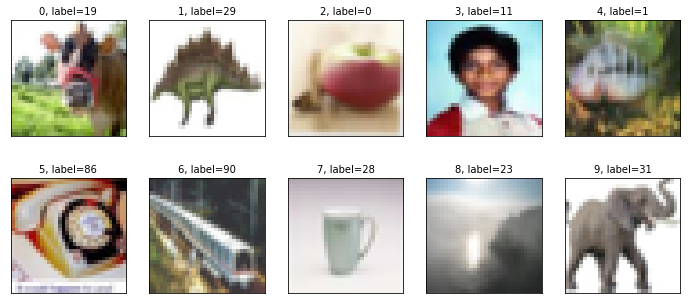

In [5]:
plot_images_labels_prediction(x_train, y_train, [], 0)

# Image normalize 

In [6]:
x_train_norm = x_train.astype('float32')/255.0
x_test_norm = x_test.astype('float32')/255.0
print(x_train_norm, x_test_norm)

[[[[1.         1.         1.        ]
   [1.         1.         1.        ]
   [1.         1.         1.        ]
   ...
   [0.7647059  0.8039216  0.75686276]
   [0.83137256 0.8784314  0.8       ]
   [0.7137255  0.7607843  0.654902  ]]

  [[1.         1.         1.        ]
   [0.99607843 0.99607843 0.99607843]
   [0.99607843 0.99607843 0.99607843]
   ...
   [0.6666667  0.6901961  0.5882353 ]
   [0.6313726  0.65882355 0.50980395]
   [0.57254905 0.6039216  0.44313726]]

  [[1.         1.         1.        ]
   [0.99607843 0.99607843 0.99607843]
   [1.         1.         1.        ]
   ...
   [0.7411765  0.78039217 0.6627451 ]
   [0.6509804  0.69803923 0.50980395]
   [0.4745098  0.52156866 0.34117648]]

  ...

  [[0.5803922  0.7254902  0.30980393]
   [0.5568628  0.7137255  0.22352941]
   [0.54901963 0.7019608  0.23529412]
   ...
   [0.11764706 0.06666667 0.00392157]
   [0.25490198 0.24313726 0.05882353]
   [0.29803923 0.3019608  0.07843138]]

  [[0.47843137 0.6156863  0.25882354]
   [0.4

# 轉換label 為OneHot Encoding

In [7]:
from keras import utils
y_train_onehot = utils.to_categorical(y_train)
y_test_onehot = utils.to_categorical(y_test)
print('y_train_onehot', y_train_onehot.shape, y_train_onehot[:5])
print('y_test_onehot', y_test_onehot.shape, y_test_onehot[:5])

y_train_onehot (50000, 100) [[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0